In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('lm_data.csv')

# Experiment: Permutation Test

lower ci: 7.8081745963202e-06; upper ci: 5.401820757964277
p-value for gender: 0.463


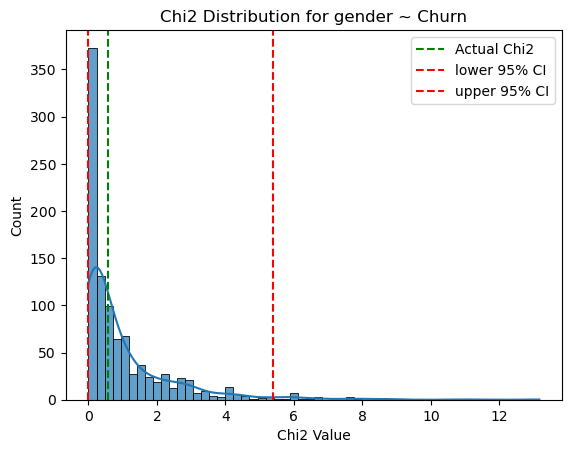

lower ci: 0.0; upper ci: 4.533284261251519
p-value for SeniorCitizen: 0.0


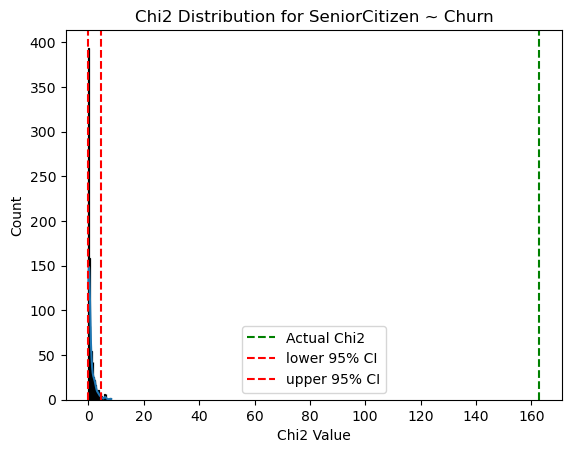

lower ci: 2.002398858363493e-05; upper ci: 4.482758680362669
p-value for Partner: 0.0


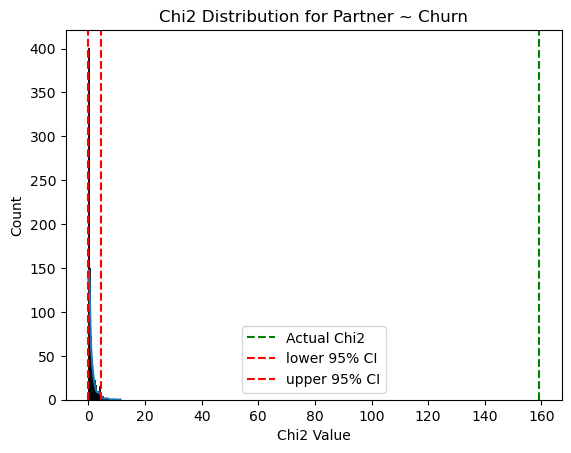

lower ci: 0.00020769251364501003; upper ci: 5.104213466704735
p-value for Dependents: 0.0


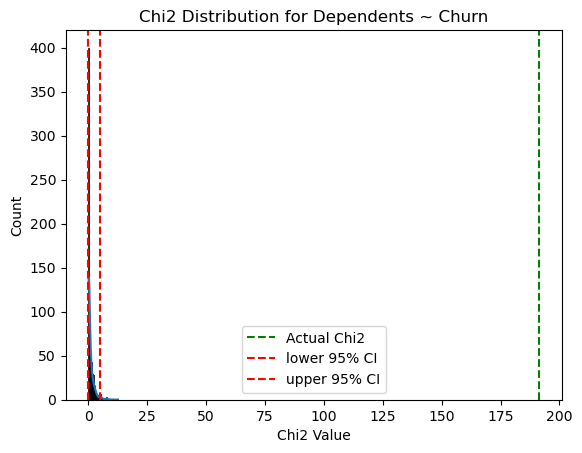

lower ci: 0.0; upper ci: 4.8150074384531605
p-value for PhoneService: 0.314


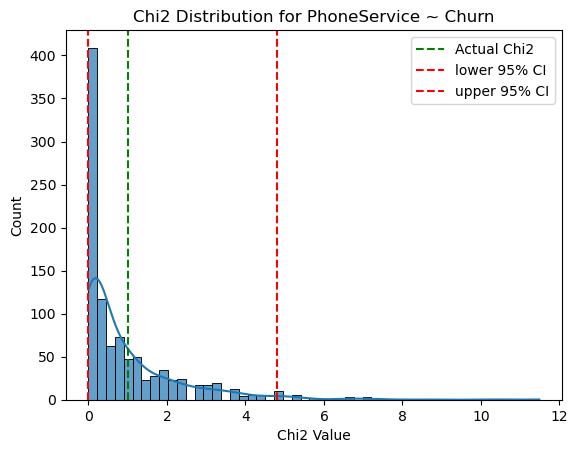

lower ci: 0.06298744462291127; upper ci: 7.18422110164539
p-value for MultipleLines: 0.0


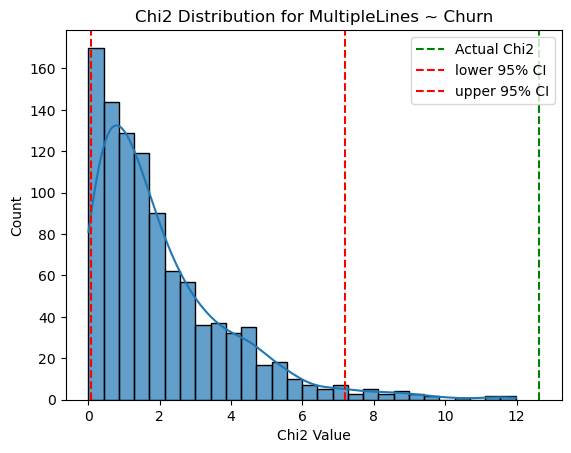

lower ci: 0.05120836442641256; upper ci: 7.796102512959852
p-value for InternetService: 0.0


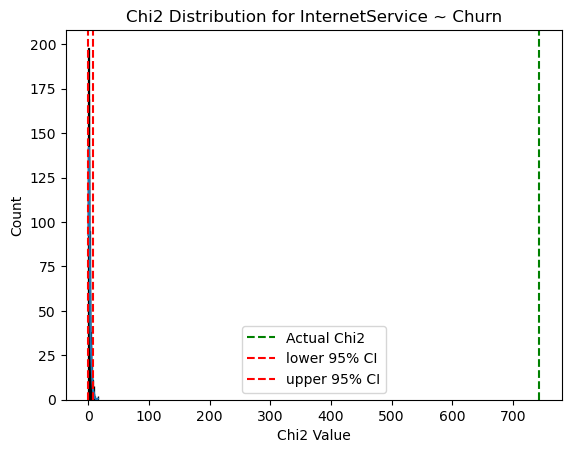

lower ci: 0.04105547335896666; upper ci: 7.604771919302349
p-value for OnlineSecurity: 0.0


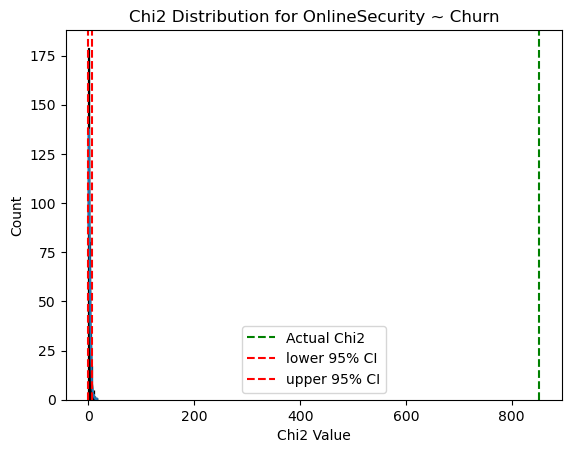

lower ci: 0.052605732831477306; upper ci: 7.097148575044179
p-value for OnlineBackup: 0.0


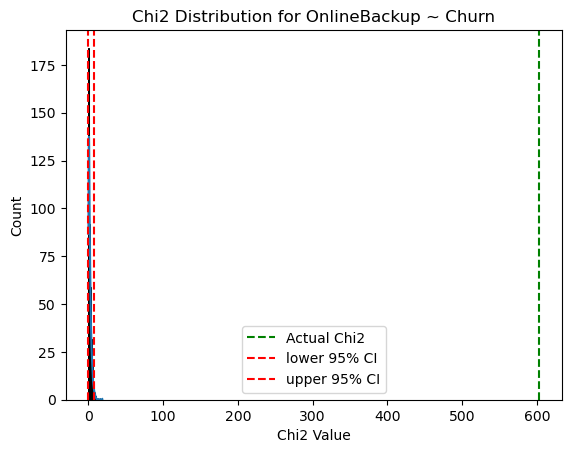

lower ci: 0.0560562125028837; upper ci: 6.836270165186825
p-value for DeviceProtection: 0.0


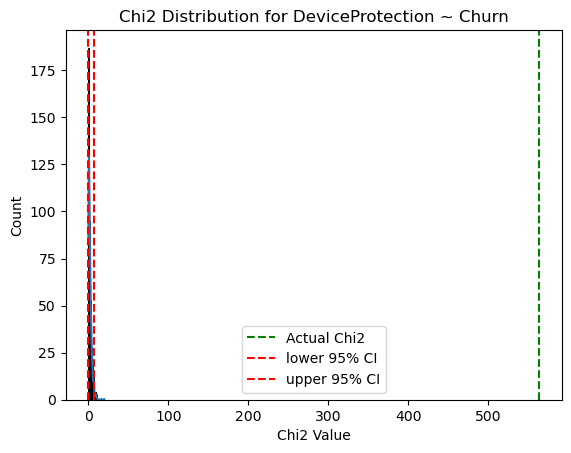

lower ci: 0.042736438183319056; upper ci: 7.207560362647886
p-value for TechSupport: 0.0


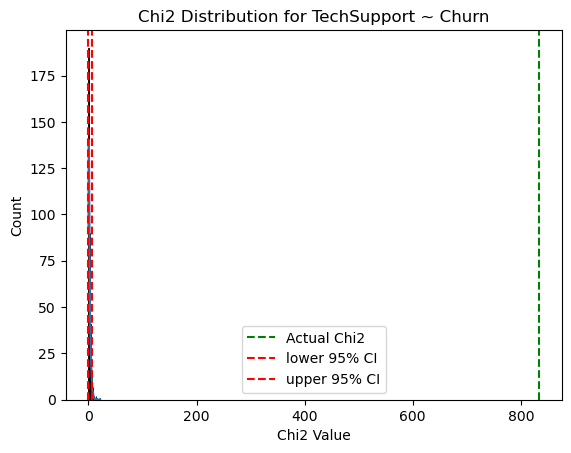

lower ci: 0.04429457453583662; upper ci: 8.035238556709837
p-value for StreamingTV: 0.0


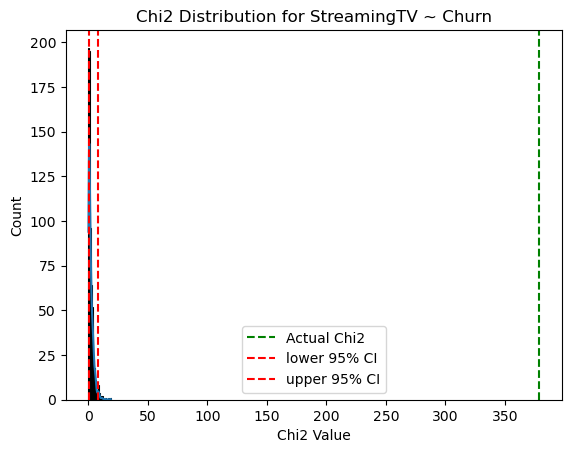

lower ci: 0.07835825048149907; upper ci: 7.501489961949315
p-value for StreamingMovies: 0.0


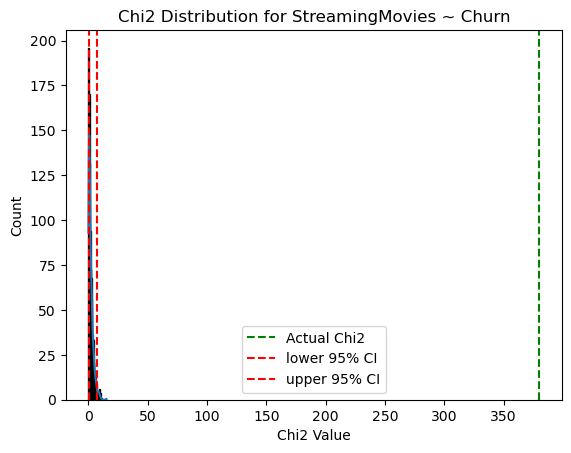

lower ci: 0.04153467389583155; upper ci: 7.383117575803286
p-value for Contract: 0.0


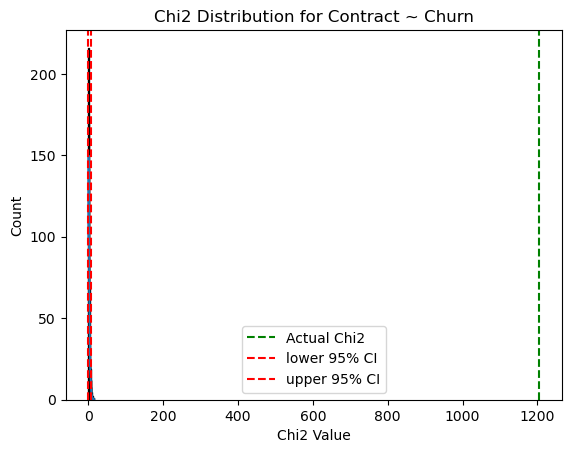

lower ci: 3.4970770409799946e-05; upper ci: 4.8820246633621105
p-value for PaperlessBilling: 0.0


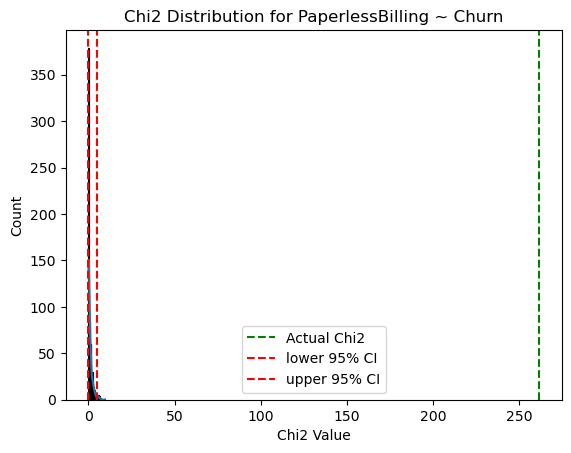

lower ci: 0.2386704373138673; upper ci: 9.502237083375068
p-value for PaymentMethod: 0.0


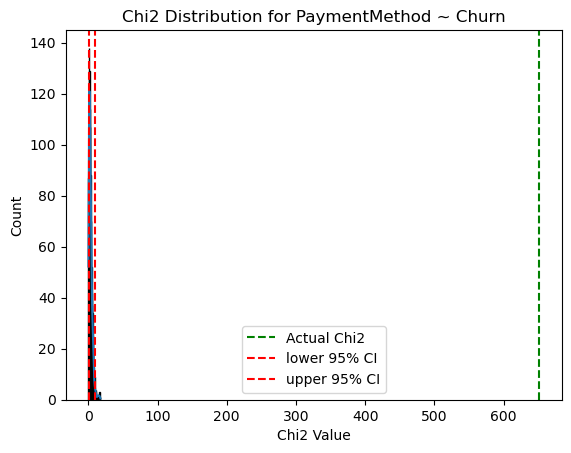

In [7]:
for col in data.columns:
    # Save Chi2 results in list
    results = []
    np.random.seed(123)

    if data[col].dtype == 'object' and col != 'Churn':

        # Calculate Chi2 for actual data
        actual_conting = pd.crosstab(data[col], data['Churn'])
        actual_chi2, _, _, _ = chi2_contingency(actual_conting)

        # Perform 1000 permutations
        for i in range(1000):
            x_permuted = np.random.permutation(data[col].values)
            chi2_conting = pd.crosstab(x_permuted, data['Churn'])
            chi2, _, _, _ = chi2_contingency(chi2_conting)
            results.append(chi2)

        # Calculate p_value
        results = np.array(results)
        p_value = np.sum(results >= actual_chi2) / len(results)

        # Calculate 95% confidence interval (two-tailed)
        ci_lower, ci_upper = np.percentile(results, [2.5, 97.5])

        # Plot
        print(f'lower ci: {ci_lower}; upper ci: {ci_upper}')
        print(f'p-value for {col}: {p_value}')
        sns.histplot(results, kde=True, alpha=0.7)
        plt.title(f'Chi2 Distribution for {col} ~ Churn')
        plt.axvline(actual_chi2, linestyle='--', color='green', label='Actual Chi2')
        plt.axvline(ci_lower, linestyle='--', color='red', label='lower 95% CI')
        plt.axvline(ci_upper, linestyle='--', color='red', label='upper 95% CI')
        plt.xlabel('Chi2 Value')
        plt.legend()
        plt.show()